In [1]:
pwd

'C:\\Users\\nazmul_hossen'

In [1]:
cd Power BI project

C:\Users\nazmul_hossen\Power BI project


In [2]:
pwd

'C:\\Users\\nazmul_hossen\\Power BI project'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('BlinkIT-Grocery-Data-csv.csv')

In [7]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


## Distinct fat content

In [12]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

## Replace LF to Low Fat, low fat to Low Fat, reg to Regular

In [8]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'low fat' : 'Low Fat',
    'LF' : 'Low Fat',
    'reg' : 'Regular'
})

In [10]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [11]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## DataFrame shape

In [12]:
df.shape

(8523, 12)

## Statistical analysis

In [13]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


## Each item statistical analysis 

In [15]:
print(df.groupby('Item Type')['Sales', 'Item Weight'].describe())

                        Sales                                             \
                        count        mean        std      min        25%   
Item Type                                                                  
Baking Goods            648.0  126.380766  58.059573  33.9874   84.06775   
Breads                  251.0  140.952669  63.499685  31.9558   91.31460   
Breakfast               110.0  141.788151  58.457031  40.0480   99.86080   
Canned                  649.0  139.763835  60.811625  36.3506   89.88040   
Dairy                   682.0  148.499211  70.326744  33.4874   88.82705   
Frozen Foods            856.0  138.503366  67.455074  31.9558   83.69935   
Fruits and Vegetables  1232.0  144.581235  60.475899  36.2506   98.39100   
Hard Drinks             214.0  137.077947  62.023383  34.2532  106.31880   
Health and Hygiene      520.0  130.818921  59.379481  33.1216   95.39165   
Household               910.0  149.424753  62.394009  32.4558  107.76220   
Meat        

C:\Users\nazmul_hossen\AppData\Local\Temp\ipykernel_8696\3516123047.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby('Item Type')['Sales', 'Item Weight'].describe())


## T-test (between low fat sales and regular sales )

In [6]:
low_fat_sales = df[df['Item Fat Content']=='Low Fat']['Sales']
regular_sales = df[df['Item Fat Content']=='Regular']['Sales']

In [9]:
t_test, p_value = ttest_ind(low_fat_sales, regular_sales)

In [10]:
t_test

-0.5144755173107076

In [11]:
p_value

0.6069338278654994

## ANOVA (among the item sales)

In [13]:
item_sales = [df[df['Item Type']==item]['Sales'] for item in df['Item Type'].unique()]

In [14]:
anova_result = f_oneway(*item_sales)

In [15]:
anova_result

F_onewayResult(statistic=7.161792493718377, pvalue=6.514385481540498e-16)

## Chi-square test (measure independence between Outlet location type and Outlet type)

In [17]:
contingency_table = pd.crosstab(df['Outlet Location Type'], df['Outlet Type'])

In [18]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [22]:
print(f'chi-square statistic: {chi2}, p_value: {p_value}, degree-of-freedom: {dof}, expected:{expected}')

chi-square statistic: 4725.606588766826, p_value: 0.0, degree-of-freedom: 6, expected:[[ 303.43822598 1562.58078141  260.00985568  261.97113692]
 [ 353.88419571 1822.35656459  303.23594978  305.52328992]
 [ 425.67757832 2192.062654    364.75419453  367.50557315]]


## Correlation between Outlet Establishment Year vs Sales

In [18]:
correlation = df['Outlet Establishment Year'].corr(df['Sales'])
print(f'Correlation between Outlet Establishment Year and Sales: {correlation}')


Correlation between Outlet Establishment Year and Sales: -0.0006542748425314243


## Correlation matrix

C:\Users\nazmul_hossen\AppData\Local\Temp\ipykernel_8696\1911412506.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                           Outlet Establishment Year  Item Visibility  \
Outlet Establishment Year                   1.000000        -0.058087   
Item Visibility                            -0.058087         1.000000   
Item Weight                                -0.004589        -0.014048   
Sales                                      -0.000654        -0.001315   
Rating                                      0.000414         0.000798   

                           Item Weight     Sales    Rating  
Outlet Establishment Year    -0.004589 -0.000654  0.000414  
Item Visibility              -0.014048 -0.001315  0.000798  
Item Weight                   1.000000  0.027141  0.002711  
Sales                         0.027141  1.000000  0.011329  
Rating                        0.002711  0.011329  1.000000  


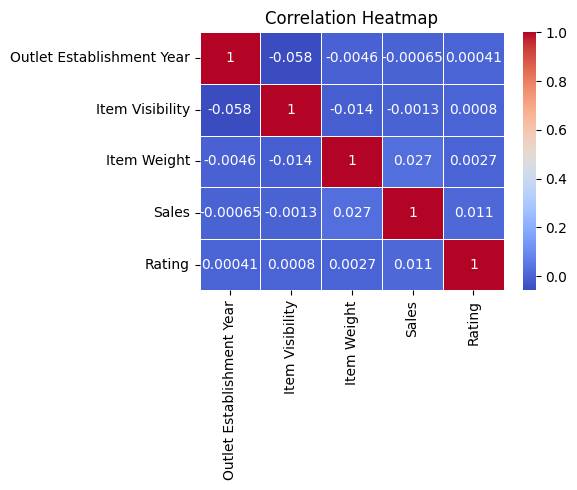

In [25]:
correlation_matrix = df.corr()

# Displaying the correlation matrix
print(correlation_matrix)

# Plotting the correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Total sales and average sales by year

In [34]:
total_sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().reset_index()
avg_sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].mean().reset_index()

In [37]:
total_sales_by_year


,Outlet Establishment Year,Sales
0,2011,78131.5666
1,2012,130476.8598
2,2014,131809.0156
3,2015,130942.7802
4,2016,132113.3698
5,2017,133103.9070
6,2018,204522.2570
7,2020,129103.9604
8,2022,131477.7764


In [36]:
avg_sales_by_year

,Outlet Establishment Year,Sales
0,2011,140.777597
1,2012,140.297699
2,2014,141.425982
3,2015,140.950248
4,2016,142.057387
5,2017,143.122481
6,2018,139.796485
7,2020,139.421124
8,2022,141.678638


## Total sales in year 2012 

In [29]:
total_sales_2012 = total_sales_by_year[total_sales_by_year['Outlet Establishment Year']==2012]

In [30]:
total_sales_2012

,Outlet Establishment Year,Sales
1,2012,130476.8598


## Aggregation (sum, mean) by year

In [39]:
sales_agg_by_year = df.groupby('Outlet Establishment Year')['Sales'].agg(['sum', 'mean']).reset_index()

print(sales_agg_by_year)


   Outlet Establishment Year          sum        mean
0                       2011   78131.5666  140.777597
1                       2012  130476.8598  140.297699
2                       2014  131809.0156  141.425982
3                       2015  130942.7802  140.950248
4                       2016  132113.3698  142.057387
5                       2017  133103.9070  143.122481
6                       2018  204522.2570  139.796485
7                       2020  129103.9604  139.421124
8                       2022  131477.7764  141.678638


In [40]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

## Missing value analysis

In [42]:
df['Item Weight'].isnull().sum()

1463

## Impute missing value by column mean

In [43]:
df['Item Weight'].fillna(df['Item Weight'].mean(), inplace=True)

In [45]:
df['Item Weight'].isnull().sum()

0

## Total sales by each item 

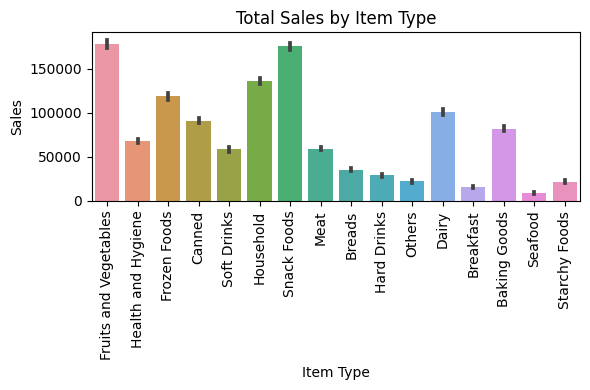

In [71]:
plt.figure(figsize=(6,4))
sns.barplot(x='Item Type', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Item Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

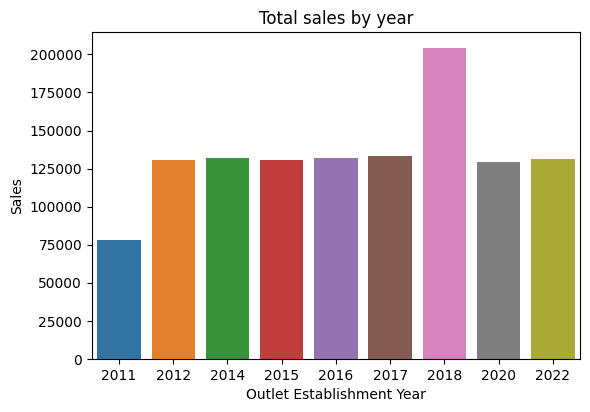

In [76]:
plt.figure(figsize=(6,4))
sns.barplot(x='Outlet Establishment Year', y='Sales', data=total_sales_by_year, estimator=sum)
plt.tight_layout()
plt.title("Total sales by year")
plt.show()

## Total sales by outlet type

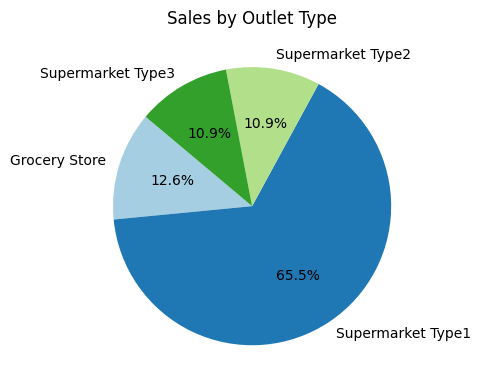

In [51]:
sales_by_outlet_type = df.groupby('Outlet Type')['Sales'].sum()
plt.figure(figsize=(6,4))
plt.pie(sales_by_outlet_type, labels=sales_by_outlet_type.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sales by Outlet Type')
plt.tight_layout()
plt.show()

## Sales trends by outlet establishment year

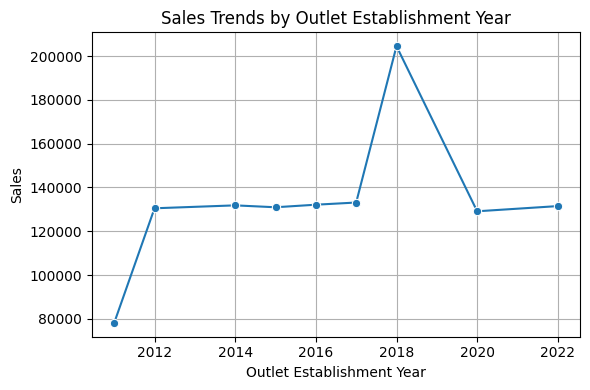

In [78]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.lineplot(x='Outlet Establishment Year', y='Sales', data=sales_by_year, marker='o')
plt.title('Sales Trends by Outlet Establishment Year')
plt.grid(True)
plt.tight_layout()
plt.show()

## Average sales by outlet establishment year

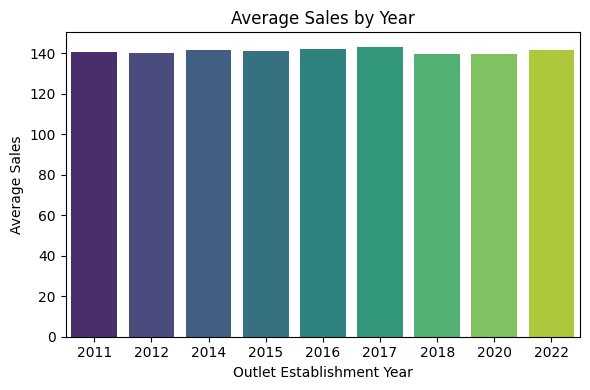

In [77]:
avg_sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Outlet Establishment Year', y='Sales', data=avg_sales_by_year, palette='viridis')
plt.title('Average Sales by Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

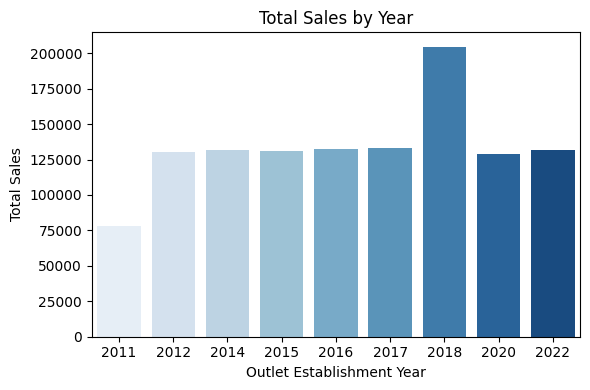

In [79]:
total_sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Outlet Establishment Year', y='Sales', data=total_sales_by_year, palette='Blues')
plt.title('Total Sales by Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## Total sales by location type

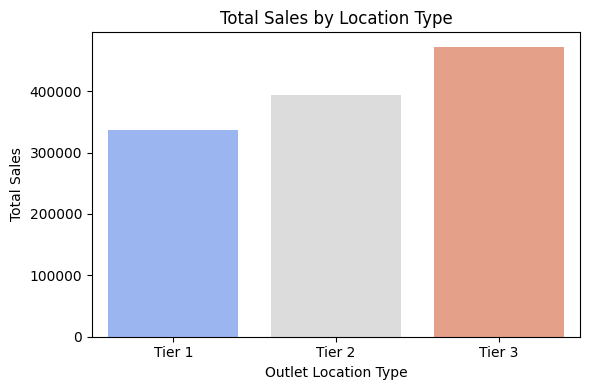

In [80]:
total_sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Outlet Location Type', y='Sales', data=total_sales_by_location, palette='coolwarm')
plt.title('Total Sales by Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## Total sales by fat content

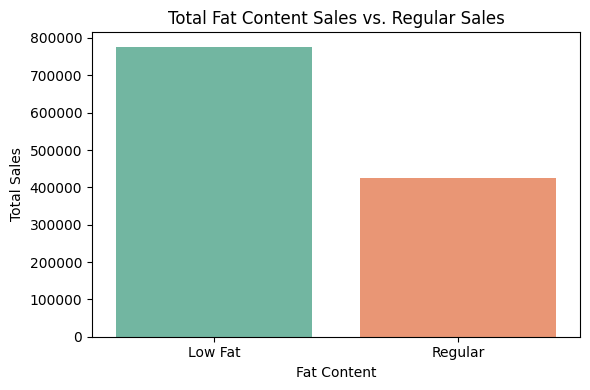

In [81]:
fat_content_sales = df.groupby('Item Fat Content')['Sales'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Item Fat Content', y='Sales', data=fat_content_sales, palette='Set2')
plt.title('Total Fat Content Sales vs. Regular Sales')
plt.xlabel('Fat Content')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## Regression anslysis (how sales impacted by Item weight, Item Visibility, Outlet Establishmet Year

In [85]:
X = df[['Item Weight', 'Item Visibility', 'Outlet Establishment Year']]
y = df['Sales']

## Train test splitting

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model instance and model fitting

In [87]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

## Model prediction ans R2 and MSE error calculation

In [88]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.0005423094862804234
Mean Squared Error: 3959.256909740981


## Actual and predicted sales plotting

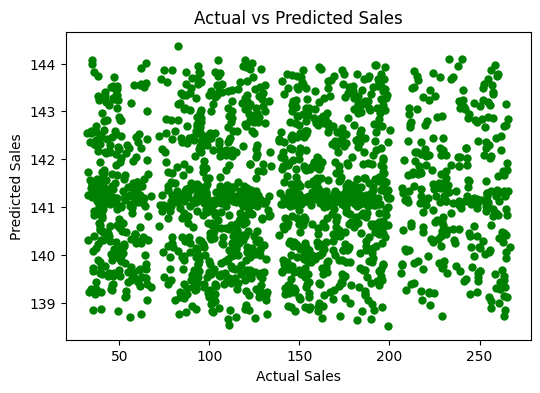

In [102]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color= 'green', linewidth=0.001)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()